<a href="https://colab.research.google.com/github/Anokyeken/Anokye-/blob/main/USGEcancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <br> SENTIMENT ANALYSIS OF CANCER MORTALITY RATE BETWEEN USA AND GERMANY <br>

## <br> Authors: Kennedy Anokye and Simon Agyemang-Kofi<br>

## <br> Importing the necessary libraries <br>

In [ ]:
!pip install pyPDF2

In [ ]:
import string
import numpy as np
import urllib as ul
import urllib.request
from lxml import html
import requests
import bs4
from bs4 import BeautifulSoup
from collections import Counter
from string import punctuation
import re
import os
import platform
import sys
import json
import pandas as pd
import PyPDF2 as pdf
from PyPDF2 import PdfFileReader
from __future__ import unicode_literals
import re
import gc
import nltk
from nltk import FreqDist
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
from sklearn.metrics import  confusion_matrix
from sklearn.svm import SVC #Classifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV 
from sklearn.metrics import accuracy_score, classification_report
import itertools #Used for iterations
from sklearn import svm
from sklearn import  metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## <br> Importing the URL <br>

In [ ]:
cancer = requests.get("https://www.cdc.gov/cancer/dcpc/research/update-on-cancer-deaths/index.htm")
text = cancer.text

In [ ]:
print(text)


<!DOCTYPE html>
<html lang="en-us" class="theme-cyan cdc-page-type-content" >
<head>
	
<!-- Global / universal meta tags -->
<meta charset="utf-8" />
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport" />
<meta name="mobile-web-app-capable" content="yes" />
<meta name="apple-mobile-web-app-capable" content="yes" />

<link rel="shortcut icon" href="/TemplatePackage/4.0/assets/imgs/favicon.ico">
<link rel="stylesheet prefetch" href="/TemplatePackage/contrib/libs/bootstrap/latest/css/bootstrap.min.css?_=34271" />
<link rel="stylesheet prefetch" href="/TemplatePackage/4.0/assets/css/app.min.css?_=34271" />
<link rel="stylesheet" media="print" href="/TemplatePackage/4.0/assets/css/print.min.css?_=34271" />
<!-- @prismcss@ -->
<script src="/JScript/metrics/adobe/VisitorAPI.js"></script>
<script src="/JScript/foresee-variables.js"></script>
<script>
/* ForeSee Embed Script v2.01
	// DO NOT MODIFY BELOW 

## <br> Text preprocessing <br>

In [ ]:
soup= BeautifulSoup(text, 'html.parser')
UScancer= soup.get_text(strip = True)
print(UScancer)

/* ForeSee Embed Script v2.01
	// DO NOT MODIFY BELOW THIS LINE *****************************************/
	;(function (g) {
		var d = document, am = d.createElement("script"), h = d.head || d.getElementsByTagName("head")[0], fsr = "fsReady",
			aex = {
				"src": "https://www.cdc.gov/JScript/foresee/latest/gateway.min.js",
				"type": "text/javascript",
				"async": "true",
				"data-vendor": "fs",
				"data-mode": "selfhost",
				"data-environment": "production",
				"data-hasssl": "true",
				"data-client": "cdc",
				"data-codelocation": "https://www.cdc.gov/JScript/foresee/latest/foresee_assets/code/19.14.4-fs/",
				"data-isselfhosted": "true",
				"data-product-assets": "https://www.cdc.gov/JScript/foresee/latest/foresee_assets/product_assets/",
				"data-role": "gateway"
			};
		for (var attr in aex){am.setAttribute(attr, aex[attr]);}h.appendChild(am); g[fsr] || (g[fsr] = function () {var aT = "__" + fsr + "_stk__";g[aT] = g[aT] || [];g[aT].push(arguments);});
	})(window);
	/* 

# Stemming

In [ ]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

for word in UScancer.split():
  print(ps.stem(word))

/*
forese
emb
script
v2.01
//
DO
not
modifi
below
thi
line
*****************************************/
;(function
(g)
{
var
d
=
document,
am
=
d.createelement("script"),
h
=
d.head
||
d.getelementsbytagname("head")[0],
fsr
=
"fsready",
aex
=
{
"src":
"https://www.cdc.gov/jscript/foresee/latest/gateway.min.js",
"type":
"text/javascript",
"async":
"true",
"data-vendor":
"fs",
"data-mode":
"selfhost",
"data-environment":
"production",
"data-hasssl":
"true",
"data-client":
"cdc",
"data-codelocation":
"https://www.cdc.gov/jscript/foresee/latest/foresee_assets/code/19.14.4-fs/",
"data-isselfhosted":
"true",
"data-product-assets":
"https://www.cdc.gov/jscript/foresee/latest/foresee_assets/product_assets/",
"data-role":
"gateway"
};
for
(var
attr
in
aex){am.setattribute(attr,
aex[attr]);}h.appendchild(am);
g[fsr]
||
(g[fsr]
=
function
()
{var
aT
=
"__"
+
fsr
+
"_stk__";g[at]
=
g[at]
||
[];g[at].push(arguments);});
})(window);
/*
DO
not
modifi
abov
thi
line
**************************************

In [ ]:
soup.table

<table class="table table-striped bg-quaternary table-hover table-hover-light">
<caption class="caption-top h4">Data table for <a href="/cancer/dcpc/research/update-on-cancer-deaths/index.htm#figure3">Figure 3.</a> Age-adjusted cancer death rates, by characteristics and cancer type: United States, 2019</caption>
<thead class="bg-primary">
<tr>
<th class="text-left" scope="col">Characteristic</th>
<th class="text-center" scope="col">All cancers</th>
<th class="text-center" scope="col">Lung cancer</th>
<th class="text-center" scope="col">Colon and rectum cancer</th>
<th class="text-center" scope="col">Female breast cancer</th>
<th class="text-center" scope="col">Prostate cancer</th>
</tr>
</thead>
<tbody>
<tr>
<th scope="row">Overall</th>
<td class="text-right">146</td>
<td class="text-right">33.4</td>
<td class="text-right">12.8</td>
<td class="text-right">19.4</td>
<td class="text-right">18.3</td>
</tr>
<tr>
<th scope="row">Female</th>
<td class="text-right">126</td>
<td class="text-ri

# Tokenization

In [ ]:

mylinks=[]
all = soup.find_all("div", {'class': 'chart-svg font-medium lines-default tableHazScroll'})
for item in all:
    for link in item.find_all("a"):
        if 'href' in link.attrs:
            a = link.attrs['href']
            mylinks.append(a)
            print(a)
            print("")

In [ ]:
tokens = [t for t in text.split()]
print(tokens)

['<!DOCTYPE', 'html>', '<html', 'lang="en-us"', 'class="theme-cyan', 'cdc-page-type-content"', '>', '<head>', '<!--', 'Global', '/', 'universal', 'meta', 'tags', '-->', '<meta', 'charset="utf-8"', '/>', '<meta', 'http-equiv="X-UA-Compatible"', 'content="IE=Edge"', '/>', '<meta', 'content="width=device-width,', 'initial-scale=1,', 'shrink-to-fit=no"', 'name="viewport"', '/>', '<meta', 'name="mobile-web-app-capable"', 'content="yes"', '/>', '<meta', 'name="apple-mobile-web-app-capable"', 'content="yes"', '/>', '<link', 'rel="shortcut', 'icon"', 'href="/TemplatePackage/4.0/assets/imgs/favicon.ico">', '<link', 'rel="stylesheet', 'prefetch"', 'href="/TemplatePackage/contrib/libs/bootstrap/latest/css/bootstrap.min.css?_=34271"', '/>', '<link', 'rel="stylesheet', 'prefetch"', 'href="/TemplatePackage/4.0/assets/css/app.min.css?_=34271"', '/>', '<link', 'rel="stylesheet"', 'media="print"', 'href="/TemplatePackage/4.0/assets/css/print.min.css?_=34271"', '/>', '<!--', '@prismcss@', '-->', '<scrip

In [ ]:
pip install nltk

# Removing Stopwords

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
clean_tokens = tokens[:]
for token in tokens:
    if token in stopwords.words('english'):
        clean_tokens.remove(token)
freq= FreqDist(clean_tokens)
for key, val in freq.items():
    print(str (key) + ':' + str(val))

Streaming output truncated to the last 5000 lines.
153.968143:1
39.574406:2
153.507279:1
39.5185745:1
153.066717:1
39.3267171:1
152.626156:1
39.1358747:1
152.237365:1
38.915594:1
151.876998:1
151.535018:1
38.2626396:1
151.259316:1
37.8718309:1
151.064903:1
37.4396112:1
150.851728:1
36.9939741:1
150.761382:2
36.5016415:1
35.9626134L150.761382:1
35.9626134zM151.743002:1
35.745378C151.743002:1
36.3158747:1
151.860756:1
36.8315551:1
152.117581:1
37.2731317:2
152.374406:1
37.7177538:1
152.720562:1
38.0943629:1
153.1327:1
38.309568:1
153.544838:1
38.5704536:1
153.984384:1
38.6658747:1
38.6760259:2
154.997473:1
155.485745:1
38.5755292:1
155.916156:1
38.2933261:1
156.348596:1
38.0557883:2
156.697797:1
37.6842549:1
156.946501:1
37.2660259:1
157.19419:1
36.4184017:1
35.9646436:1
35.4621598:1
157.198251:1
35.0053564:1
156.958683:1
34.5871274:1
156.713099:1
34.1748175:1
156.373639:1
33.8263145:1
155.967927:1
33.5699784:1
155.547711:1
33.3286789:1
155.07719:1
33.188287:1
154.593456:1
33.1598704:2
1

# Removing Punctuations

In [ ]:
sent_tok =[]
for sent in tokens:
    sent = sent_tokenize(sent)
    sent_tok.append(sent)

In [ ]:
sent_tok

[['<!DOCTYPE'],
 ['html>'],
 ['<html'],
 ['lang="en-us"'],
 ['class="theme-cyan'],
 ['cdc-page-type-content"'],
 ['>'],
 ['<head>'],
 ['<!--'],
 ['Global'],
 ['/'],
 ['universal'],
 ['meta'],
 ['tags'],
 ['-->'],
 ['<meta'],
 ['charset="utf-8"'],
 ['/>'],
 ['<meta'],
 ['http-equiv="X-UA-Compatible"'],
 ['content="IE=Edge"'],
 ['/>'],
 ['<meta'],
 ['content="width=device-width,'],
 ['initial-scale=1,'],
 ['shrink-to-fit=no"'],
 ['name="viewport"'],
 ['/>'],
 ['<meta'],
 ['name="mobile-web-app-capable"'],
 ['content="yes"'],
 ['/>'],
 ['<meta'],
 ['name="apple-mobile-web-app-capable"'],
 ['content="yes"'],
 ['/>'],
 ['<link'],
 ['rel="shortcut'],
 ['icon"'],
 ['href="/TemplatePackage/4.0/assets/imgs/favicon.ico">'],
 ['<link'],
 ['rel="stylesheet'],
 ['prefetch"'],
 ['href="/TemplatePackage/contrib/libs/bootstrap/latest/css/bootstrap.min.css?_=34271"'],
 ['/>'],
 ['<link'],
 ['rel="stylesheet'],
 ['prefetch"'],
 ['href="/TemplatePackage/4.0/assets/css/app.min.css?_=34271"'],
 ['/>'],
 ['

In [ ]:
clean_text_2 = [word_tokenize(i) for i in tokens ]

In [ ]:
clean_text_2

[['<', '!', 'DOCTYPE'],
 ['html', '>'],
 ['<', 'html'],
 ['lang=', "''", 'en-us', "''"],
 ['class=', "''", 'theme-cyan'],
 ['cdc-page-type-content', "''"],
 ['>'],
 ['<', 'head', '>'],
 ['<', '!', '--'],
 ['Global'],
 ['/'],
 ['universal'],
 ['meta'],
 ['tags'],
 ['--', '>'],
 ['<', 'meta'],
 ['charset=', "''", 'utf-8', "''"],
 ['/', '>'],
 ['<', 'meta'],
 ['http-equiv=', "''", 'X-UA-Compatible', "''"],
 ['content=', "''", 'IE=Edge', "''"],
 ['/', '>'],
 ['<', 'meta'],
 ['content=', "''", 'width=device-width', ','],
 ['initial-scale=1', ','],
 ['shrink-to-fit=no', "''"],
 ['name=', "''", 'viewport', "''"],
 ['/', '>'],
 ['<', 'meta'],
 ['name=', "''", 'mobile-web-app-capable', "''"],
 ['content=', "''", 'yes', "''"],
 ['/', '>'],
 ['<', 'meta'],
 ['name=', "''", 'apple-mobile-web-app-capable', "''"],
 ['content=', "''", 'yes', "''"],
 ['/', '>'],
 ['<', 'link'],
 ['rel=', "''", 'shortcut'],
 ['icon', "''"],
 ['href=', "''", '/TemplatePackage/4.0/assets/imgs/favicon.ico', "''", '>'],
 [

In [ ]:
import re
clean_text_3 = []
for words in clean_text_2:
  clean=[]
  for w in words:
    res = re.sub(r'[^\w\s]',"",w)
  if res!= " ":
    clean.append(res)
    clean_text_3.append(clean)

In [ ]:
clean_text_3

[['DOCTYPE'],
 [''],
 ['html'],
 [''],
 ['themecyan'],
 [''],
 [''],
 [''],
 [''],
 ['Global'],
 [''],
 ['universal'],
 ['meta'],
 ['tags'],
 [''],
 ['meta'],
 [''],
 [''],
 ['meta'],
 [''],
 [''],
 [''],
 ['meta'],
 [''],
 [''],
 [''],
 [''],
 [''],
 ['meta'],
 [''],
 [''],
 [''],
 ['meta'],
 [''],
 [''],
 [''],
 ['link'],
 ['shortcut'],
 [''],
 [''],
 ['link'],
 ['stylesheet'],
 [''],
 [''],
 [''],
 ['link'],
 ['stylesheet'],
 [''],
 [''],
 [''],
 ['link'],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 ['script'],
 [''],
 ['script'],
 [''],
 [''],
 [''],
 ['ForeSee'],
 ['Embed'],
 ['Script'],
 ['v201'],
 [''],
 ['DO'],
 ['NOT'],
 ['MODIFY'],
 ['BELOW'],
 ['THIS'],
 ['LINE'],
 [''],
 ['function'],
 [''],
 [''],
 ['var'],
 ['d'],
 [''],
 [''],
 ['am'],
 [''],
 [''],
 ['h'],
 [''],
 ['dhead'],
 [''],
 [''],
 ['fsr'],
 [''],
 [''],
 ['aex'],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''],
 [''

# extracting the table from the text

In [ ]:
data1 = pd.read_html("https://www.cdc.gov/cancer/dcpc/research/update-on-cancer-deaths/index.htm")

In [ ]:
data1

[                                Characteristic  ...  Prostate cancer
 0                                      Overall  ...             18.3
 1                                       Female  ...              NaN
 2                                         Male  ...             18.3
 3  American Indian/Alaska Native, non-Hispanic  ...             14.9
 4         Asian/Pacific Islander, non-Hispanic  ...              7.8
 5                          Black, non-Hispanic  ...             36.3
 6                          White, non-Hispanic  ...             17.4
 7                                     Hispanic  ...             14.7
 8                                        Rural  ...             18.7
 9                                        Urban  ...             18.2
 
 [10 rows x 6 columns]]

# converting the extracted table to csv  dataset

In [ ]:
data1[0].to_csv('USupate.csv')

In [ ]:
df= pd.read_csv('USupate.csv')

In [ ]:
df

,Unnamed: 0,Characteristic,All cancers,Lung cancer,Colon and rectum cancer,Female breast cancer,Prostate cancer
0,0,Overall,146,33.4,12.8,19.4,18.3
1,1,Female,126,28.2,10.8,19.4,NaN
2,2,Male,173,40.1,15.2,NaN,18.3
3,3,"American Indian/Alaska Native, non-Hispanic",124,29.1,12.4,15.7,14.9
4,4,"Asian/Pacific Islander, non-Hispanic",92,19.0,9.0,11.5,7.8
5,5,"Black, non-Hispanic",171,35.7,16.8,27.8,36.3
6,6,"White, non-Hispanic",151,36.5,12.9,19.4,17.4
7,7,Hispanic,106,14.8,10.4,13.8,14.7
8,8,Rural,164,41.8,15.3,20.1,18.7
9,9,Urban,143,31.8,12.4,19.3,18.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10 non-null     int64  
 1   Characteristic           10 non-null     object 
 2   All cancers              10 non-null     int64  
 3   Lung cancer              10 non-null     float64
 4   Colon and rectum cancer  10 non-null     float64
 5   Female breast cancer     9 non-null      float64
 6   Prostate cancer          9 non-null      float64
dtypes: float64(4), int64(2), object(1)
memory usage: 688.0+ bytes


# <br> Data preprocessing <br>

## <br> Dropping the unwanted culumn <br>

In [ ]:
df.drop('Unnamed: 0', axis=1, inplace = True)

In [ ]:
df

,Characteristic,All cancers,Lung cancer,Colon and rectum cancer,Female breast cancer,Prostate cancer
0,Overall,146,33.4,12.8,19.4,18.3
1,Female,126,28.2,10.8,19.4,NaN
2,Male,173,40.1,15.2,NaN,18.3
3,"American Indian/Alaska Native, non-Hispanic",124,29.1,12.4,15.7,14.9
4,"Asian/Pacific Islander, non-Hispanic",92,19.0,9.0,11.5,7.8
5,"Black, non-Hispanic",171,35.7,16.8,27.8,36.3
6,"White, non-Hispanic",151,36.5,12.9,19.4,17.4
7,Hispanic,106,14.8,10.4,13.8,14.7
8,Rural,164,41.8,15.3,20.1,18.7
9,Urban,143,31.8,12.4,19.3,18.2


## <br> Handling the missing data <br>

In [ ]:
df.isnull()

,Characteristic,All cancers,Lung cancer,Colon and rectum cancer,Female breast cancer,Prostate cancer
0,False,False,False,False,False,False
1,False,False,False,False,False,True
2,False,False,False,False,True,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,False,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


In [ ]:
df.isnull().sum()


Characteristic             0
All cancers                0
Lung cancer                0
Colon and rectum cancer    0
Female breast cancer       1
Prostate cancer            1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Characteristic           10 non-null     object 
 1   All cancers              10 non-null     int64  
 2   Lung cancer              10 non-null     float64
 3   Colon and rectum cancer  10 non-null     float64
 4   Female breast cancer     9 non-null      float64
 5   Prostate cancer          9 non-null      float64
dtypes: float64(4), int64(1), object(1)
memory usage: 608.0+ bytes


In [ ]:
cancerUSA = df.fillna(0)

In [ ]:
cancerUSA

,Characteristic,All cancers,Lung cancer,Colon and rectum cancer,Female breast cancer,Prostate cancer
0,Overall,146,33.4,12.8,19.4,18.3
1,Female,126,28.2,10.8,19.4,0.0
2,Male,173,40.1,15.2,0.0,18.3
3,"American Indian/Alaska Native, non-Hispanic",124,29.1,12.4,15.7,14.9
4,"Asian/Pacific Islander, non-Hispanic",92,19.0,9.0,11.5,7.8
5,"Black, non-Hispanic",171,35.7,16.8,27.8,36.3
6,"White, non-Hispanic",151,36.5,12.9,19.4,17.4
7,Hispanic,106,14.8,10.4,13.8,14.7
8,Rural,164,41.8,15.3,20.1,18.7
9,Urban,143,31.8,12.4,19.3,18.2


In [ ]:
cancerUSA.describe()

,All cancers,Lung cancer,Colon and rectum cancer,Female breast cancer,Prostate cancer
count,10.000000,10.000000,10.000000,10.000000,10.000000
mean,139.600000,31.040000,12.800000,16.640000,16.460000
std,27.289396,8.667077,2.416149,7.293102,9.194104
min,92.000000,14.800000,9.000000,0.000000,0.000000
25%,124.500000,28.425000,11.200000,14.275000,14.750000
50%,144.500000,32.600000,12.600000,19.350000,17.800000
75%,160.750000,36.300000,14.625000,19.400000,18.300000
max,173.000000,41.800000,16.800000,27.800000,36.300000


In [ ]:
print(cancerUSA.columns)

Index(['Characteristic', 'All cancers', 'Lung cancer',
       'Colon and rectum cancer', 'Female breast cancer', 'Prostate cancer'],
      dtype='object')


## checking the corelation on the USA data

In [ ]:
cancerUSA.iloc[:, 0:6].corr()

,All cancers,Lung cancer,Colon and rectum cancer,Female breast cancer,Prostate cancer
All cancers,1.000000,0.929715,0.946214,0.142060,0.658532
Lung cancer,0.929715,1.000000,0.842103,0.112630,0.455463
Colon and rectum cancer,0.946214,0.842103,1.000000,0.212938,0.797533
Female breast cancer,0.142060,0.112630,0.212938,1.000000,0.358579
Prostate cancer,0.658532,0.455463,0.797533,0.358579,1.000000


In [ ]:
corelation= cancerUSA.corr()

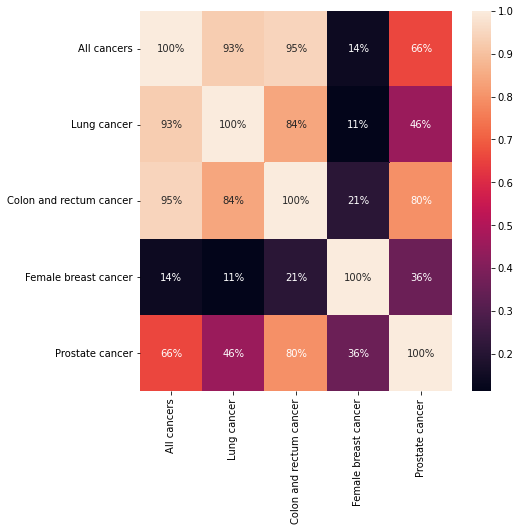

In [ ]:
plt.figure(figsize=(7,7))
sns.heatmap(corelation, xticklabels=corelation.columns , yticklabels =corelation.columns , 
            annot=True, fmt='.0%')
plt.show()

## The pairwise relationships in USA dataset

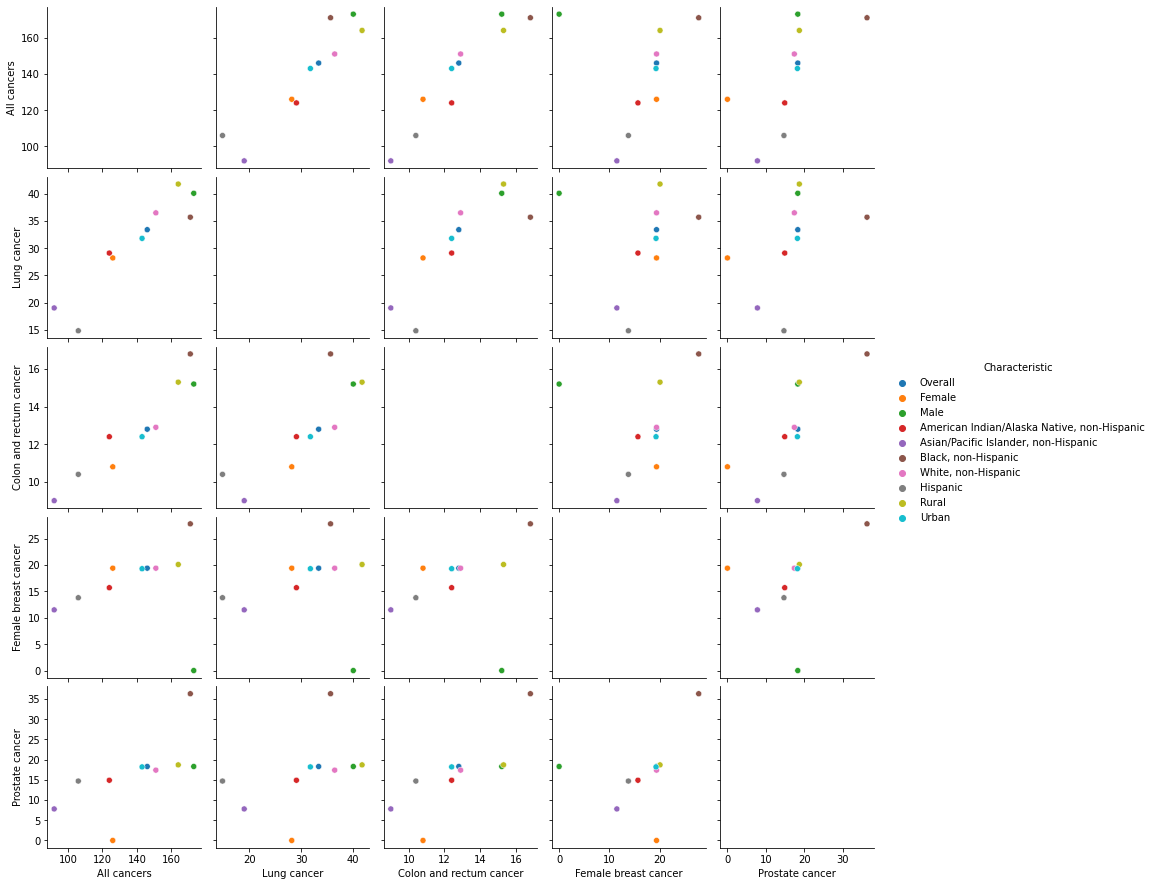

In [ ]:
sns.pairplot(cancerUSA, hue= 'Characteristic')
plt.show()

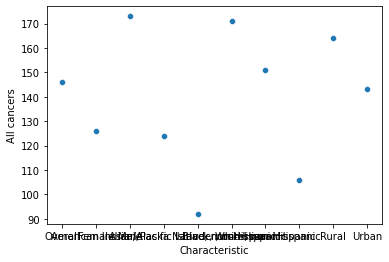

In [ ]:
sns.scatterplot(data=cancerUSA, x="Characteristic", y="All cancers");

<Figure size 1080x1080 with 0 Axes>

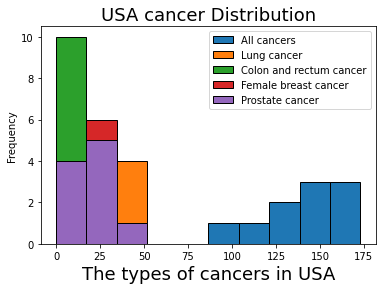

In [ ]:
plt.figure(figsize=(15,15),facecolor='red',edgecolor='blue')
pltcancerUSA = cancerUSA.plot(kind="hist", ec="black")
pltcancerUSA.set_title("USA cancer Distribution", fontsize=18)
pltcancerUSA.set_xlabel("The types of cancers in USA", fontsize=18)
plt.show()



In [ ]:
def graph(plot, x_label, y_label, x_rot=None, y_rot =None, fontsize=12, fontweight=None, legend=True, save=False, save_name=None):
    ax.tick_params(direction='out', length=7, width=3, colors='k', grid_color='k', grid_alpha=1, grid_linewidth=2)
    plt.xticks(fontsize=fontsize, fontweight=fontweight, rotation=x_rot)
    plt.yticks(fontsize=fontsize, fontweight=fontweight, rotation=y_rot)
    
    
    if legend ==True:
        plt.legend()
    else:
        ax.legend().remove()
            
    plt.xlabel(x_label, fontsize=fontsize, fontweight=fontweight, color='k')
    plt.ylabel(y_label, fontsize =fontsize, fontweight=fontweight, color='k')
        
        
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(3)
        
    if save==True:
        plt.savefig(save_name)

No handles with labels found to put in legend.


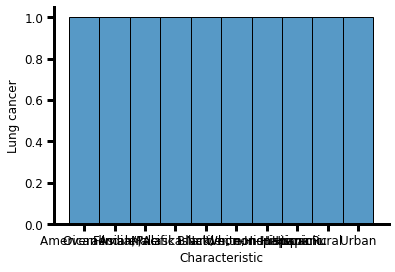

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.histplot(data=cancerUSA, x='Characteristic', palette=['darkblue','darkred','darkgreen'])#Count plot
graph(plot, 'Characteristic', 'Lung cancer', legend=None, save=True, save_name='Characteristic Count.png')#Plotter function for aesthetics
plot;
plt.show()

In [ ]:
cancerUSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Characteristic           10 non-null     object 
 1   All cancers              10 non-null     int64  
 2   Lung cancer              10 non-null     float64
 3   Colon and rectum cancer  10 non-null     float64
 4   Female breast cancer     10 non-null     float64
 5   Prostate cancer          10 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 608.0+ bytes


# Encode the categorical data values

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit_transform(cancerUSA.iloc[:, 0].values)

array([6, 3, 5, 0, 1, 2, 9, 4, 7, 8])

In [ ]:
cancerUSA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Characteristic           10 non-null     object 
 1   All cancers              10 non-null     int64  
 2   Lung cancer              10 non-null     float64
 3   Colon and rectum cancer  10 non-null     float64
 4   Female breast cancer     10 non-null     float64
 5   Prostate cancer          10 non-null     float64
dtypes: float64(4), int64(1), object(1)
memory usage: 608.0+ bytes


# Building models for USA dataset

# split the US data into independent(x) and dependent(y)

In [ ]:
x =cancerUSA.iloc[:, 1:7].values
y= cancerUSA.iloc[:, 0]

In [ ]:
y

0                                        Overall
1                                         Female
2                                           Male
3    American Indian/Alaska Native, non-Hispanic
4           Asian/Pacific Islander, non-Hispanic
5                            Black, non-Hispanic
6                            White, non-Hispanic
7                                       Hispanic
8                                          Rural
9                                          Urban
Name: Characteristic, dtype: object

#Split the US dataset into 70% training and 30% testing



In [ ]:
x_train_US,x_test_US,y_train_US,y_test_US = train_test_split(x, y, test_size=0.30, random_state=0)

In [ ]:
y_test_US

2                                    Male
8                                   Rural
4    Asian/Pacific Islander, non-Hispanic
Name: Characteristic, dtype: object

# Scale the US data(feature scaling)

In [ ]:
x_train_US =sc.fit_transform(x_train_US) #Scaling and fitting the training set to a model
x_test_US =sc.fit_transform(x_test_US) #Transformation of testing set based off of trained scaler model

# Create a function for the models (US data)

# Decision Tree Classification model

In [ ]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier(max_depth =5)
dt_clf.fit(x_train_US, y_train_US)
dt_clf.score(x_test_US, y_test_US)

y_predus = dt_clf.predict(x_test_US)
dt_clf.score(x_test_US, y_test_US)

0.0

In [ ]:
y_predus =dt_clf.predict(x_test_US)
confusion_matrix(y_test_US, y_predus)

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0]])

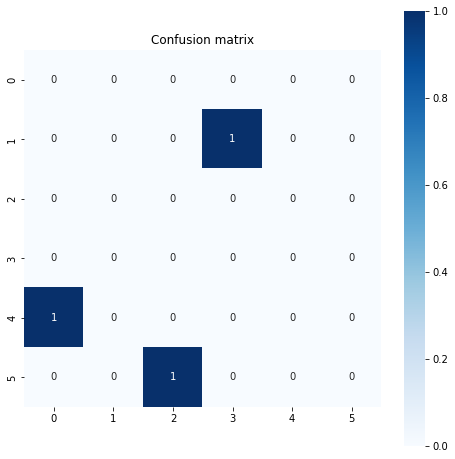

In [ ]:
plt.figure(figsize=(8,8))
mat1 = confusion_matrix(y_test_US, y_predus)
axes= sns.heatmap(mat1, square=True, annot =True, fmt= 'd', cbar = True, cmap = plt.cm.Blues)
axes.set_title('Confusion matrix')
plt.show()

## Support Vector Machine Model

In [ ]:
sv_clf = SVC(probability=True, kernel='linear')
sv_clf.fit(x_test_US, y_test_US)
sv_clf.score(x_test_US, y_test_US)

1.0

In [ ]:
y_predussv =sv_clf.predict(x_test_US)
confusion_matrix(y_test_US, y_predussv)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

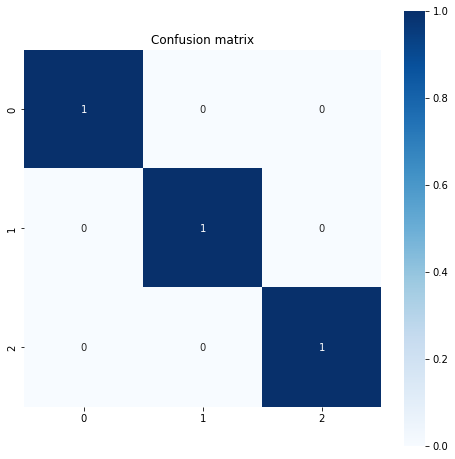

In [ ]:
plt.figure(figsize=(8,8))
matsv = confusion_matrix(y_test_US, y_predussv)
axes= sns.heatmap(matsv, square=True, annot =True, fmt= 'd', cbar = True, cmap = plt.cm.Blues)
axes.set_title('Confusion matrix')
plt.show()

## the classification on the prediction

In [ ]:
print("classification:", metrics.classification_report(y_test_US, y_pred=y_predussv))

classification:                                       precision    recall  f1-score   support

Asian/Pacific Islander, non-Hispanic       1.00      1.00      1.00         1
                                Male       1.00      1.00      1.00         1
                               Rural       1.00      1.00      1.00         1

                            accuracy                           1.00         3
                           macro avg       1.00      1.00      1.00         3
                        weighted avg       1.00      1.00      1.00         3



In [ ]:
print("classification:", metrics.classification_report(y_test_US, y_pred=y_predus))

classification:                                              precision    recall  f1-score   support

American Indian/Alaska Native, non-Hispanic       0.00      0.00      0.00       0.0
       Asian/Pacific Islander, non-Hispanic       0.00      0.00      0.00       1.0
                        Black, non-Hispanic       0.00      0.00      0.00       0.0
                                   Hispanic       0.00      0.00      0.00       0.0
                                       Male       0.00      0.00      0.00       1.0
                                      Rural       0.00      0.00      0.00       1.0

                                   accuracy                           0.00       3.0
                                  macro avg       0.00      0.00      0.00       3.0
                               weighted avg       0.00      0.00      0.00       3.0



## importing the Germany data on cancer 

In [ ]:
!pip install tabula

In [ ]:
url = "https://edoc.rki.de/bitstream/handle/176904/5931/cancer_germany_2013_2014.pdf"


In [ ]:
!pip install tabula-py

In [ ]:
from tabula import read_pdf 

In [ ]:
import PyPDF2

In [ ]:
pdfFileObj = open('cancer_germany_2013_2014.pdf', 'rb')
pdffileReader = PyPDF2.PdfFileReader(pdfFileObj)

In [ ]:

print(pdffileReader.getNumPages)

<bound method PdfFileReader.getNumPages of <PyPDF2.pdf.PdfFileReader object at 0x7f5a88d22690>>


In [ ]:
pagesobj = pdffileReader.getPage(17)

In [ ]:
Ger=pagesobj.extractText()

In [ ]:
Ger

"Cancer in Germany\nTable 3.0.2\nNumber of deaths from cancer in Germany 2014\n  cial cause of death statistics, F\n  ce, Wiesbaden\nNo. of deathsMortality rate\n1Cancer site\n ICD-10MenWomenMenWomen\nOral cavity and pharynx– \n\nOesophagus\n\nStomach\n\nColon and rectum– \n\nLiver\n\nGallbladder and biliary tract\nPancreas\n\nLarynx\n\nLung\n\nMalignant melanoma of the skin\n\nMesothelioma\n\nSoft tissue not incl. Mesothelioma\n\nBreast\n\nVulva\n\nCervix\n\nUterus\n\nOvaries\n\nProstate\n\nTestis\n\nKidney\n\nBladder\n\nCentral nervous system– \n\nThyroid gland\n\nHodgkin's lymphoma\n\nNon-Hodgkin lymphomas\n\nMultiple myeloma\n\nLeukaemias\n\nOther cancer sites\n\nTotal cancer\n! – \nFigure 3.0.2Most frequent tumour sites when cancer was the cause of death in Germany 2014 1 age-standardised (old European Standard)  2 not including non-melanoma skin cancer (C44)MenWomen\nSoft tissue not incl. MesotheliomaMesotheliomaLarynxGallbladder and biliary tractMalignant melanoma of the skinMul

In [ ]:
! apt-get install ghostscript

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono gsfonts libcupsfilters1 libcupsimage2
  libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
Suggested packages:
  fonts-noto ghostscript-x poppler-utils fonts-japanese-mincho
  | fonts-ipafont-mincho fonts-japanese-gothic | fonts-ipafont-gothic
  fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono ghostscript gsfonts libcupsfilters1
  libcupsimage2 libgs9 libgs9-common libijs-0.35 libjbig2dec0 poppler-data
0 upgraded, 11 newly installed, 0 to remove and 37 not upgraded.
Need to get 7,409 kB/14.1 MB of archives.
After this operation, 49.9 MB of additional disk space will be used.
Ign:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgs9-common all 9.26~dfsg+0-0ubuntu0.18.04.14
Ign:2 http://archive.ubu

In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive

In [ ]:
from tabula import read_pdf

In [ ]:
tables1 = read_pdf("cancer_germany_2013_2014.pdf", pages = '18', multiple_tables=True)

In [ ]:
tables1

[                            Unnamed: 0  ... Mortality rate1
 0                          Cancer site  ...           Women
 1              Oral cavity and pharynx  ...             1.9
 2                           Oesophagus  ...             1.6
 3                              Stomach  ...             4.6
 4                     Colon and rectum  ...            12.8
 5                                Liver  ...             2.9
 6        Gallbladder and biliary tract  ...             2.3
 7                             Pancreas  ...             9.5
 8                               Larynx  ...             0.3
 9                                 Lung  ...            21.7
 10      Malignant melanoma of the skin  ...             1.7
 11                        Mesothelioma  ...             0.3
 12  Soft tissue not incl. Mesothelioma  ...             1.2
 13                              Breast  ...            23.0
 14                               Vulva  ...             0.9
 15                     

In [ ]:
tables2 = read_pdf("cancer_germany_2013_2014.pdf", pages = '67', multiple_tables=True)

In [ ]:
tables2

[       Unnamed: 0  ... Mortality risk
 0        Men aged  ...           ever
 1        35 years  ...     (1 in 410)
 2        45 years  ...     (1 in 410)
 3        55 years  ...     (1 in 400)
 4        65 years  ...     (1 in 400)
 5        75 years  ...     (1 in 490)
 6   Lifetime risk  ...     (1 in 420)
 7      Women aged  ...           ever
 8        35 years  ...   (1 in 1,700)
 9        45 years  ...   (1 in 1,700)
 10       55 years  ...   (1 in 1,700)
 11       65 years  ...   (1 in 1,800)
 12       75 years  ...   (1 in 2,500)
 13  Lifetime risk  ...   (1 in 1,700)
 
 [14 rows x 5 columns],    80  80.1
 0  60    60
 1  40    40
 2  20    20]

# coverting the text to csv file

In [ ]:
tables2[0].to_csv('Germanyt.csv')

In [ ]:
dfGt= pd.read_csv('Germanyt.csv')

In [ ]:
dfGt

,Unnamed: 0,Unnamed: 0.1,Risk of developing cancer,Unnamed: 1,Unnamed: 2,Mortality risk
0,0,Men aged,in the next ten years ever,in the next ten years,NaN,ever
1,1,35 years,"< 0.1 % (1 in 50,000) 0.3 % (1 in 360)","< 0.1 % (1 in 105,000)",0.2 %,(1 in 410)
2,2,45 years,"< 0.1 % (1 in 11,000) 0.3 % (1 in 360)","< 0.1 % (1 in 20,000)",0.2 %,(1 in 410)
3,3,55 years,"< 0.1 % (1 in 2,900) 0.3 % (1 in 350)","< 0.1 % (1 in 4,500)",0.2 %,(1 in 400)
4,4,65 years,0.1 % (1 in 910) 0.3 % (1 in 360),"0.1 % (1 in 1,100)",0.3 %,(1 in 400)
5,5,75 years,0.2 % (1 in 650) 0.2 % (1 in 480),0.1 % (1 in 700),0.2 %,(1 in 490)
6,6,Lifetime risk,0.3 % (1 in 360),NaN,0.2 %,(1 in 420)
7,7,Women aged,in the next ten years ever,in the next ten years,NaN,ever
8,8,35 years,"< 0.1 % (1 in 360,000) 0.1 % (1 in 1,500)","< 0.1 % (1 in 1,600,000)",0.1 %,"(1 in 1,700)"
9,9,45 years,"< 0.1 % (1 in 43,000) 0.1 % (1 in 1,500)","< 0.1 % (1 in 65,000)",0.1 %,"(1 in 1,700)"


In [ ]:
dfGt.rename(columns = {'Unnamed: 0.1':'Age', 'Unnamed: 1':' ',
                              'Unnamed: 2':' '}, inplace = True)

In [ ]:
dfGt = dfGt.drop(dfGt.columns[[0]], axis=1)

In [ ]:
GerRisk = dfGt.fillna(0)

## coverting the tergeted text to csv file

In [ ]:
tables1[0].to_csv('Germany.csv')

# importing the csv file

In [ ]:
dfG= pd.read_csv('Germany.csv')

In [ ]:
dfG

,Unnamed: 0,Unnamed: 0.1,Unnamed: 1,Unnamed: 2,No. of deaths,Unnamed: 3,Mortality rate1
0,0,Cancer site,ICD-10,Men,Women,Men,Women
1,1,Oral cavity and pharynx,C00 – C14,"4,095","1,353",7.3,1.9
2,2,Oesophagus,C15,"4,107","1,236",6.9,1.6
3,3,Stomach,C16,"5,545","4,065",8.8,4.6
4,4,Colon and rectum,C18 – C21,"13,580","11,932",21.0,12.8
5,5,Liver,C22,"5,246","2,440",8.2,2.9
6,6,Gallbladder and biliary tract,"C23, C24","1,544","2,199",2.4,2.3
7,7,Pancreas,C25,"8,231","8,384",13.0,9.5
8,8,Larynx,C32,"1,301",224,2.2,0.3
9,9,Lung,"C33, C34","29,560","15,524",47.6,21.7


# data preprocessing on Germany dataset

In [ ]:
print(dfG.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 1', 'Unnamed: 2',
       'No. of deaths', 'Unnamed: 3', 'Mortality rate1'],
      dtype='object')


In [ ]:
dfG.rename(columns = {'Unnamed: 0.1':'Cancer type', 'Unnamed: 1':'ICD 10',
                              'Unnamed: 2':'Men deaths','No. of deaths':'Women deaths', 'Unnamed: 3':'Men Motality rate', 'Mortality rate1':'Women Mortality rate'}, inplace = True)

In [ ]:
dfG

,Unnamed: 0,Cancer type,ICD 10,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
0,0,Cancer site,ICD-10,Men,Women,Men,Women
1,1,Oral cavity and pharynx,C00 – C14,"4,095","1,353",7.3,1.9
2,2,Oesophagus,C15,"4,107","1,236",6.9,1.6
3,3,Stomach,C16,"5,545","4,065",8.8,4.6
4,4,Colon and rectum,C18 – C21,"13,580","11,932",21.0,12.8
5,5,Liver,C22,"5,246","2,440",8.2,2.9
6,6,Gallbladder and biliary tract,"C23, C24","1,544","2,199",2.4,2.3
7,7,Pancreas,C25,"8,231","8,384",13.0,9.5
8,8,Larynx,C32,"1,301",224,2.2,0.3
9,9,Lung,"C33, C34","29,560","15,524",47.6,21.7


In [ ]:
dfG2 = dfG.drop(dfG.columns[[0]], axis=1)

In [ ]:
dfG2

,Cancer type,ICD 10,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
0,Cancer site,ICD-10,Men,Women,Men,Women
1,Oral cavity and pharynx,C00 – C14,"4,095","1,353",7.3,1.9
2,Oesophagus,C15,"4,107","1,236",6.9,1.6
3,Stomach,C16,"5,545","4,065",8.8,4.6
4,Colon and rectum,C18 – C21,"13,580","11,932",21.0,12.8
5,Liver,C22,"5,246","2,440",8.2,2.9
6,Gallbladder and biliary tract,"C23, C24","1,544","2,199",2.4,2.3
7,Pancreas,C25,"8,231","8,384",13.0,9.5
8,Larynx,C32,"1,301",224,2.2,0.3
9,Lung,"C33, C34","29,560","15,524",47.6,21.7


In [ ]:
dfG2.fillna(0)

,Cancer type,ICD 10,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
0,Cancer site,ICD-10,Men,Women,Men,Women
1,Oral cavity and pharynx,C00 – C14,"4,095","1,353",7.3,1.9
2,Oesophagus,C15,"4,107","1,236",6.9,1.6
3,Stomach,C16,"5,545","4,065",8.8,4.6
4,Colon and rectum,C18 – C21,"13,580","11,932",21.0,12.8
5,Liver,C22,"5,246","2,440",8.2,2.9
6,Gallbladder and biliary tract,"C23, C24","1,544","2,199",2.4,2.3
7,Pancreas,C25,"8,231","8,384",13.0,9.5
8,Larynx,C32,"1,301",224,2.2,0.3
9,Lung,"C33, C34","29,560","15,524",47.6,21.7


In [ ]:
cancerG = dfG2.drop(columns=['ICD 10'])

In [ ]:
cancerG

,Cancer type,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
0,Cancer site,Men,Women,Men,Women
1,Oral cavity and pharynx,"4,095","1,353",7.3,1.9
2,Oesophagus,"4,107","1,236",6.9,1.6
3,Stomach,"5,545","4,065",8.8,4.6
4,Colon and rectum,"13,580","11,932",21.0,12.8
5,Liver,"5,246","2,440",8.2,2.9
6,Gallbladder and biliary tract,"1,544","2,199",2.4,2.3
7,Pancreas,"8,231","8,384",13.0,9.5
8,Larynx,"1,301",224,2.2,0.3
9,Lung,"29,560","15,524",47.6,21.7


In [ ]:
cancerG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cancer type           30 non-null     object
 1   Men deaths            26 non-null     object
 2   Women deaths          28 non-null     object
 3   Men Motality rate     26 non-null     object
 4   Women Mortality rate  28 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [ ]:
cancerG.columns

Index(['Cancer type', 'Men deaths', 'Women deaths', 'Men Motality rate',
       'Women Mortality rate'],
      dtype='object')

In [ ]:
Gcancer= cancerG.fillna(0)

In [ ]:
Gcancer

,Cancer type,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
0,Cancer site,Men,Women,Men,Women
1,Oral cavity and pharynx,"4,095","1,353",7.3,1.9
2,Oesophagus,"4,107","1,236",6.9,1.6
3,Stomach,"5,545","4,065",8.8,4.6
4,Colon and rectum,"13,580","11,932",21.0,12.8
5,Liver,"5,246","2,440",8.2,2.9
6,Gallbladder and biliary tract,"1,544","2,199",2.4,2.3
7,Pancreas,"8,231","8,384",13.0,9.5
8,Larynx,"1,301",224,2.2,0.3
9,Lung,"29,560","15,524",47.6,21.7


In [ ]:
Gcancer.describe()

,Cancer type,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
count,30,30,30,30,30
unique,30,27,29,26,27
top,Liver,0,0,0,0
freq,1,4,2,4,2


In [ ]:
Gcancer.drop(index =0)

,Cancer type,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
1,Oral cavity and pharynx,"4,095","1,353",7.3,1.9
2,Oesophagus,"4,107","1,236",6.9,1.6
3,Stomach,"5,545","4,065",8.8,4.6
4,Colon and rectum,"13,580","11,932",21.0,12.8
5,Liver,"5,246","2,440",8.2,2.9
6,Gallbladder and biliary tract,"1,544","2,199",2.4,2.3
7,Pancreas,"8,231","8,384",13.0,9.5
8,Larynx,"1,301",224,2.2,0.3
9,Lung,"29,560","15,524",47.6,21.7
10,Malignant melanoma of the skin,"1,804","1,270",2.9,1.7


In [ ]:
Gcancer.dtypes

Cancer type             object
Men deaths              object
Women deaths            object
Men Motality rate       object
Women Mortality rate    object
dtype: object

In [ ]:
Gcancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Cancer type           30 non-null     object
 1   Men deaths            30 non-null     object
 2   Women deaths          30 non-null     object
 3   Men Motality rate     30 non-null     object
 4   Women Mortality rate  30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [ ]:
Gcancer

,Cancer type,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
0,Cancer site,Men,Women,Men,Women
1,Oral cavity and pharynx,"4,095","1,353",7.3,1.9
2,Oesophagus,"4,107","1,236",6.9,1.6
3,Stomach,"5,545","4,065",8.8,4.6
4,Colon and rectum,"13,580","11,932",21.0,12.8
5,Liver,"5,246","2,440",8.2,2.9
6,Gallbladder and biliary tract,"1,544","2,199",2.4,2.3
7,Pancreas,"8,231","8,384",13.0,9.5
8,Larynx,"1,301",224,2.2,0.3
9,Lung,"29,560","15,524",47.6,21.7


In [ ]:
Gcancer.dtypes

Cancer type             object
Men deaths              object
Women deaths            object
Men Motality rate       object
Women Mortality rate    object
dtype: object

In [ ]:
CancerGE = pd.DataFrame.from_dict({'Cancer type' :['Oral cavity and pharynx', 'Oesophagus', 'Stomach', 'Colon and rectum','Liver', 'Gallbladder and biliary tract', 'Pancreas','Larynx','Lung', 'Malignant melanoma of the skin', 'Mesothelioma', 'Soft tissue not incl. Mesothelioma', 'Breast','Vulva','Cervix','Uterus','Ovaries','Prostate','Testis','Kidney','Bladder','Central nervous system','Thyroid gland','Hodgkins lymphoma','Non-Hodgkin lymphomas','Multiple myeloma', 'Leukaemias','Other cancer sites','Total cancer'], 'Men deaths' : [4095, 4107, 5545, 13580, 5246, 1544, 8231, 1301, 29560, 1804, 1151, 724, 134, 0, 0	, 0, 0, 13704, 153, 3243, 3897, 3340, 342, 183, 3560, 2071, 4168, 9648, 121331],
                                    'Women deaths':[1353, 1236, 4065, 11932, 2440, 2199, 8384, 224, 15524, 1270, 277, 901, 17670, 849, 1506, 2472, 5354, 0, 0, 2035, 1795, 2765, 390, 150, 2949, 1910, 3575, 8416, 101641], 'Men Motality rate': [7.3, 6.9, 8.8, 21.0, 8.2, 2.4, 13.0, 2.2, 47.6, 2.9, 1.7, 1.2, 0.2, 0, 0, 0, 0, 19.7, 0.3, 5.1, 5.8, 6.1, 0.6, 0.3, 5.5, 3.1, 6.4, 15.3, 191.5], 'Women Mortality rate'
                                      :[1.9, 1.6, 4.6, 12.8, 2.9, 2.3, 9.5, 0.3, 21.7, 1.7, 0.3, 1.2, 23.0, 0.9, 2.4, 2.9, 6.9, 0, 0, 2.2, 1.8, 4.1, 0.4, 0.2, 3.1, 2.1, 4.0, 9.3, 124.1]})

In [ ]:
CancerGE

,Cancer type,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
0,Oral cavity and pharynx,4095,1353,7.3,1.9
1,Oesophagus,4107,1236,6.9,1.6
2,Stomach,5545,4065,8.8,4.6
3,Colon and rectum,13580,11932,21.0,12.8
4,Liver,5246,2440,8.2,2.9
5,Gallbladder and biliary tract,1544,2199,2.4,2.3
6,Pancreas,8231,8384,13.0,9.5
7,Larynx,1301,224,2.2,0.3
8,Lung,29560,15524,47.6,21.7
9,Malignant melanoma of the skin,1804,1270,2.9,1.7


In [ ]:
CancerGE.columns

Index(['Cancer type', 'Men deaths', 'Women deaths', 'Men Motality rate',
       'Women Mortality rate'],
      dtype='object')

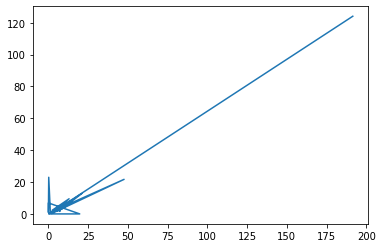

In [ ]:
plt.plot(CancerGE['Men Motality rate'], CancerGE['Women Mortality rate'])

plt.show()

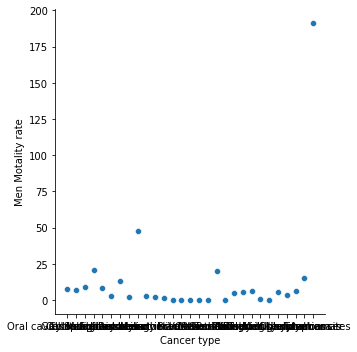

In [ ]:
sns.relplot(x="Cancer type", y="Men Motality rate", data=CancerGE)

In [ ]:
def Plotter(plot, x_label, y_label, x_rot=None, y_rot=None,  fontsize=12, fontweight=None, legend=True, save=False,save_name=None):
    """
    Helper function to make a quick consistent plot with few easy changes for aesthetics.
    Input:
    plot: sns or matplot plotting function
    x_label: x_label as string
    y_label: y_label as string
    x_rot: x-tick rotation, default=None, can be int 0-360
    y_rot: y-tick rotation, default=None, can be int 0-360
    fontsize: size of plot font on axis, defaul=12, can be int/float
    fontweight: Adding character to font, default=None, can be 'bold'
    legend: Choice of including legend, default=True, bool
    save: Saves image output, default=False, bool
    save_name: Name of output image file as .png. Requires Save to be True.
               default=None, string: 'Insert Name.png'
    Output: A customized plot based on given parameters and an output file
    
    """
    #Ticks
    ax.tick_params(direction='out', length=5, width=3, colors='k',
               grid_color='k', grid_alpha=1,grid_linewidth=2)
    plt.xticks(fontsize=fontsize, fontweight=fontweight, rotation=x_rot)
    plt.yticks(fontsize=fontsize, fontweight=fontweight, rotation=y_rot)

    #Legend
    if legend==True:
        plt.legend()
    else:
        ax.legend().remove()
        #Labels
    plt.xlabel(x_label, fontsize=fontsize, fontweight=fontweight, color='k')
    plt.ylabel(y_label, fontsize=fontsize, fontweight=fontweight, color='k')

    #Removing Spines and setting up remianing, preset prior to use.
    ax.spines['top'].set_color(None)
    ax.spines['right'].set_color(None)
    ax.spines['bottom'].set_color('k')
    ax.spines['bottom'].set_linewidth(3)
    ax.spines['left'].set_color('k')
    ax.spines['left'].set_linewidth(3)
    
    if save==True:
        plt.savefig(save_name)
        


No handles with labels found to put in legend.


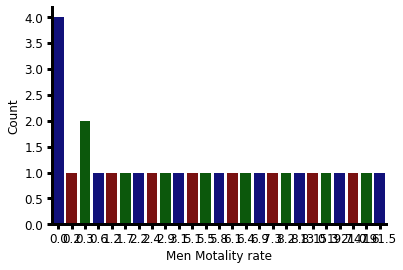

In [ ]:
fig, ax=plt.subplots()#Required outside of function. This needs to be activated first when plotting in every code block
plot=sns.countplot(data=CancerGE, x='Men Motality rate', palette=['darkblue','darkred','darkgreen'])#Count plot
Plotter(plot, 'Men Motality rate', 'Count', legend=None, save=True, save_name='Men Motality rate .png')#Plotter function for aesthetics
plot
plt.show()

In [ ]:
CancerGE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancer type           29 non-null     object 
 1   Men deaths            29 non-null     int64  
 2   Women deaths          29 non-null     int64  
 3   Men Motality rate     29 non-null     float64
 4   Women Mortality rate  29 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


In [ ]:
CancerGE.describe()

,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
count,29.000000,29.000000,29.000000,29.000000
mean,8367.655172,7009.724138,13.210345,8.558621
std,22575.280720,18759.716935,35.635299,22.975352
min,0.000000,0.000000,0.000000,0.000000
25%,342.000000,901.000000,0.600000,1.200000
50%,3243.000000,2035.000000,5.100000,2.300000
75%,5246.000000,4065.000000,8.200000,4.600000
max,121331.000000,101641.000000,191.500000,124.100000


In [ ]:
CancerGE.shape

(29, 5)

In [ ]:
CancerGE.columns

Index(['Cancer type', 'Men deaths', 'Women deaths', 'Men Motality rate',
       'Women Mortality rate'],
      dtype='object')

In [ ]:
CancerGE['Cancer type'].value_counts()


Liver                                 1
Total cancer                          1
Oral cavity and pharynx               1
Leukaemias                            1
Multiple myeloma                      1
Stomach                               1
Gallbladder and biliary tract         1
Non-Hodgkin lymphomas                 1
Central nervous system                1
Cervix                                1
Malignant melanoma of the skin        1
Colon and rectum                      1
Bladder                               1
Lung                                  1
Prostate                              1
Thyroid gland                         1
Larynx                                1
Ovaries                               1
Mesothelioma                          1
Testis                                1
Soft tissue not incl. Mesothelioma    1
Uterus                                1
Oesophagus                            1
Kidney                                1
Hodgkins lymphoma                     1


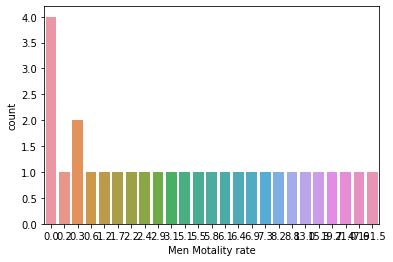

In [ ]:
sns.countplot(CancerGE['Men Motality rate'], label='Count')

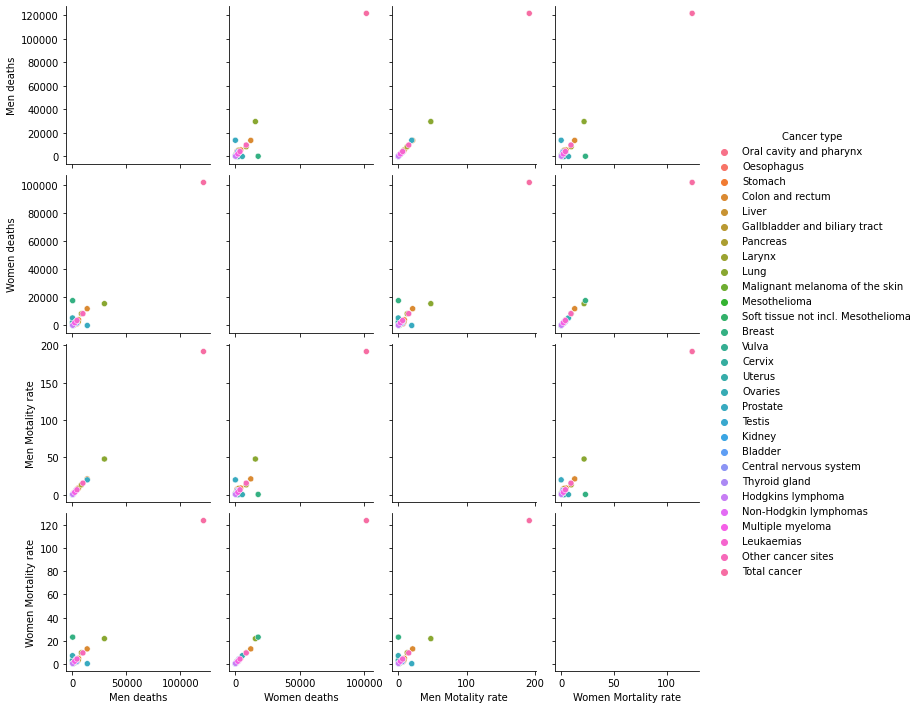

In [ ]:
sns.pairplot(CancerGE.iloc[:, 0:5], hue='Cancer type')
plt.show()

# Checking the correlation 

In [ ]:
CancerGE.iloc[:, 0:6].corr()

,Men deaths,Women deaths,Men Motality rate,Women Mortality rate
Men deaths,1.000000,0.970636,0.999907,0.970190
Women deaths,0.970636,1.000000,0.971127,0.999453
Men Motality rate,0.999907,0.971127,1.000000,0.970873
Women Mortality rate,0.970190,0.999453,0.970873,1.000000


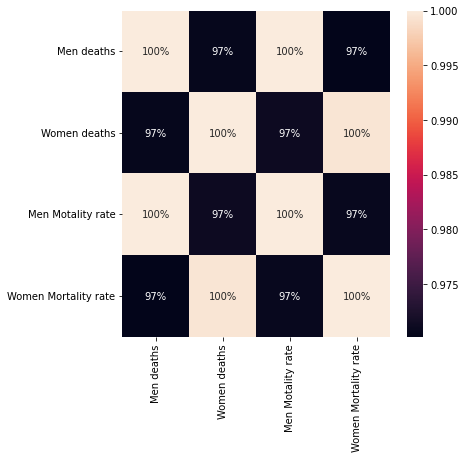

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(CancerGE.iloc[:, 0:6].corr(),annot=True,fmt='.0%')
plt.show()

## Building models for Germany dataset

# Encode the categorical data values

In [ ]:
#from sklearn.preprocessing import OrdinalEncoder

#ord_enc = OrdinalEncoder()
#CancerGE["Cancer_code"] = ord_enc.fit_transform(CancerGE[["Cancer type"]])
#CancerGE[["Cancer type", "Cancer_code"]].head(5)

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
labelencoder_Y.fit_transform(CancerGE.iloc[:, 0].values)

array([17, 16, 23,  4, 10,  5, 20,  8, 11, 12, 13, 22,  1, 28,  3, 27, 19,
       21, 24,  7,  0,  2, 25,  6, 15, 14,  9, 18, 26])

# split the dataset into independent(X) and dependent(Y) datasets

In [ ]:
X= CancerGE.iloc[:, 3:5].values
Y= CancerGE.iloc[:, 0].values

#Split the Germany dataset into 70% training and 30% testing

In [ ]:


X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

In [ ]:
Y_train

array(['Cervix', 'Lung', 'Ovaries', 'Thyroid gland', 'Prostate',
       'Oesophagus', 'Mesothelioma', 'Total cancer', 'Pancreas', 'Liver',
       'Testis', 'Kidney', 'Malignant melanoma of the skin', 'Larynx',
       'Non-Hodgkin lymphomas', 'Colon and rectum',
       'Oral cavity and pharynx', 'Central nervous system', 'Uterus',
       'Breast'], dtype=object)

# scale the data (feature Scaling)

In [ ]:


X_train =sc.fit_transform(X_train) #Scaling and fitting the training set to a model
X_test =sc.fit_transform(X_test) #Transformation of testing set based off of trained scaler model

In [ ]:
Y_test

array(['Stomach', 'Bladder', 'Hodgkins lymphoma', 'Vulva',
       'Soft tissue not incl. Mesothelioma', 'Multiple myeloma',
       'Other cancer sites', 'Leukaemias',
       'Gallbladder and biliary tract'], dtype=object)

In [ ]:
CancerGE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancer type           29 non-null     object 
 1   Men deaths            29 non-null     int64  
 2   Women deaths          29 non-null     int64  
 3   Men Motality rate     29 non-null     float64
 4   Women Mortality rate  29 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


In [ ]:
# Create a function for the models
def models(X_train, Y_train):
# Logistic Regression
  #from sklearn.linear_model import LogisticRegression
  #log = LogisticRegression(random_state =0)
  #log.fit(X_train, Y_train)

  # support vector mechine
  sv_clf = SVC(probability=True, kernel='linear')
  sv_clf.fit(X_train, Y_train)
  #sv_clf.score(x_test_US, y_test_US)

  # Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  # Random forest classifier
  #from sklearn.ensemble import RandomForestClassifier
  #forest = RandomForestClassifier(n_estimators =10, criterion = 'entropy', random_state = 0)
  #forest.fit(X_train, Y_train)

  # Print the models accuracy on the training data
  print('[0] Support Vector Machine traning accuracy:', sv_clf.score(X_train, Y_train))
  print('[1] Decision Tree Classifer traning accuracy:', tree.score(X_train, Y_train))
  #print('[2] Random forest Classifer traning accuracy:', forest.score(X_train, Y_train))
  return sv_clf, tree



# getting all the models

In [ ]:
model =models(X_train, Y_train)

[0] Support Vector Machine traning accuracy: 1.0
[1] Decision Tree Classifer traning accuracy: 1.0


In [ ]:
# test model accuracy on confusion matrix

for i in range(len(model)):
  print('model', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  acc = np.diag(cm).sum()/cm.sum()
  print(cm)
  print('Testing Accuracy =', acc)
  print()

model 0
[[0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]]
Testing Accuracy = 0.0

model 1
[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


show another way to get metrics of the models

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
for i in range(len(model)):
  print('model', i)
  print(classification_report(Y_test,model[i].predict(X_test)))
  print(accuracy_score(Y_test,model[i].predict(X_test)))
  print()

model 0
                                    precision    recall  f1-score   support

                           Bladder       0.00      0.00      0.00       1.0
                            Cervix       0.00      0.00      0.00       0.0
     Gallbladder and biliary tract       0.00      0.00      0.00       1.0
                 Hodgkins lymphoma       0.00      0.00      0.00       1.0
                        Leukaemias       0.00      0.00      0.00       1.0
                              Lung       0.00      0.00      0.00       0.0
                  Multiple myeloma       0.00      0.00      0.00       1.0
                Other cancer sites       0.00      0.00      0.00       1.0
                          Prostate       0.00      0.00      0.00       0.0
Soft tissue not incl. Mesothelioma       0.00      0.00      0.00       1.0
                           Stomach       0.00      0.00      0.00       1.0
                            Testis       0.00      0.00      0.00       0.0
   

# print the prediction of Decision Tree classifier

In [ ]:
pred = model[1].predict(X_test)
print(pred)
print()
print(Y_test)

['Lung' 'Prostate' 'Cervix' 'Cervix' 'Cervix' 'Mesothelioma'
 'Total cancer' 'Colon and rectum' 'Central nervous system']

['Stomach' 'Bladder' 'Hodgkins lymphoma' 'Vulva'
 'Soft tissue not incl. Mesothelioma' 'Multiple myeloma'
 'Other cancer sites' 'Leukaemias' 'Gallbladder and biliary tract']


# print the prediction of support vector machine classifier

In [ ]:
pred = model[0].predict(X_test)
print(pred)
print()
print(Y_test)

['Lung' 'Prostate' 'Testis' 'Testis' 'Testis' 'Cervix' 'Lung' 'Lung'
 'Uterus']

['Stomach' 'Bladder' 'Hodgkins lymphoma' 'Vulva'
 'Soft tissue not incl. Mesothelioma' 'Multiple myeloma'
 'Other cancer sites' 'Leukaemias' 'Gallbladder and biliary tract']


In [ ]:
CancerGE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cancer type           29 non-null     object 
 1   Men deaths            29 non-null     int64  
 2   Women deaths          29 non-null     int64  
 3   Men Motality rate     29 non-null     float64
 4   Women Mortality rate  29 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.3+ KB


model 0


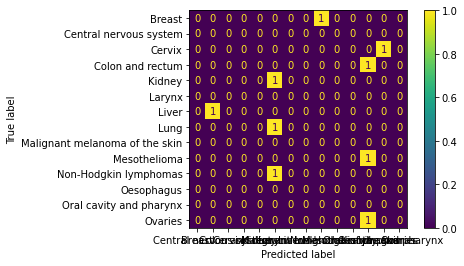

model 1


<Figure size 720x720 with 0 Axes>

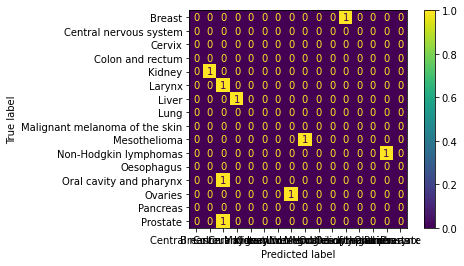

<Figure size 720x720 with 0 Axes>

In [ ]:
for i in range(len(model)):
  print('model', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  clf = SVC(random_state=0)
  clf.fit(X_train, Y_train)
  SVC(random_state=0)
  predictions = clf.predict(X_test)
  
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  disp.plot()
  plt.show()
  plt.figure(figsize=(10, 10))
  axes.set_title('Confusion matrix')

In [ ]:
GerRisk

,Age,Risk of developing cancer,,,Mortality risk
0,Men aged,in the next ten years ever,in the next ten years,0,ever
1,35 years,"< 0.1 % (1 in 50,000) 0.3 % (1 in 360)","< 0.1 % (1 in 105,000)",0.2 %,(1 in 410)
2,45 years,"< 0.1 % (1 in 11,000) 0.3 % (1 in 360)","< 0.1 % (1 in 20,000)",0.2 %,(1 in 410)
3,55 years,"< 0.1 % (1 in 2,900) 0.3 % (1 in 350)","< 0.1 % (1 in 4,500)",0.2 %,(1 in 400)
4,65 years,0.1 % (1 in 910) 0.3 % (1 in 360),"0.1 % (1 in 1,100)",0.3 %,(1 in 400)
5,75 years,0.2 % (1 in 650) 0.2 % (1 in 480),0.1 % (1 in 700),0.2 %,(1 in 490)
6,Lifetime risk,0.3 % (1 in 360),0,0.2 %,(1 in 420)
7,Women aged,in the next ten years ever,in the next ten years,0,ever
8,35 years,"< 0.1 % (1 in 360,000) 0.1 % (1 in 1,500)","< 0.1 % (1 in 1,600,000)",0.1 %,"(1 in 1,700)"
9,45 years,"< 0.1 % (1 in 43,000) 0.1 % (1 in 1,500)","< 0.1 % (1 in 65,000)",0.1 %,"(1 in 1,700)"
